# Sign_language_detecttion_Model 

#### Importing the data from the folder and checking classes


In [1]:

from os import listdir
total_signs=sorted(listdir("D:/main_data/asl_alphabet_train"))
print(total_signs)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


#### Visualising some of the pictures 

C:\Users\Jolan\AppData\Local\Temp\ipykernel_11776\508505911.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


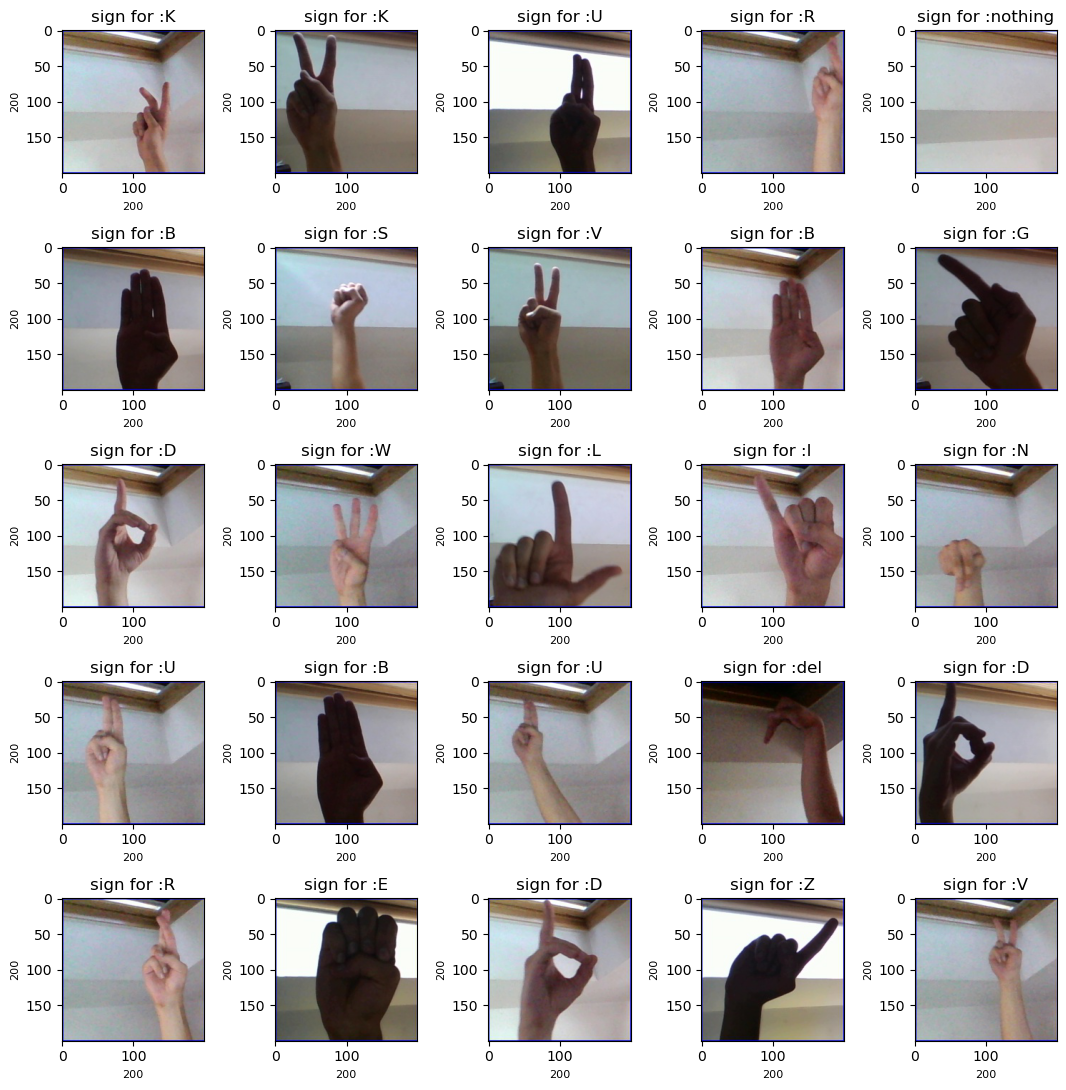

In [2]:
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
plt.figure(figsize=(11,11))
path='D:/main_data/asl_alphabet_train'

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    directry=random.choice(total_signs)
    rand_img = imread(path +'/'+ directry+'/'+random.choice(sorted(listdir(path+'/'+directry+'/'))))
    plt.imshow(rand_img)
    plt.title('sign for :'+directry)
    plt.xlabel(rand_img.shape[1], fontsize = 8)
    plt.ylabel(rand_img.shape[0], fontsize = 8)

#### Creating a variable for main folder  

In [3]:
root_dir = listdir(path)
image_list, label_list = [], []
print(root_dir)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#### resizing our images 

In [4]:
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.utils import img_to_array
for directory in root_dir:
    i=0
    for files in listdir(f"{path}/{directory}"):
        image_path = f"{path}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((50,50))
        image = img_to_array(image)
        image_list.append(image)
        
        label_list.append(directory)
        i+=1
        if i>3000:
          break

In [5]:
import pandas as pd

print(directory)
label_counts = pd.DataFrame(label_list).value_counts()
sorted(label_counts)

Z


[3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000]

In [6]:
num_classes = len(label_counts)
num_classes

29

In [8]:
import numpy as np


In [9]:
label_list = np.array(label_list)
label_list.shape

(87000,)

#### Starting our training phase of the model by splitting the data 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [11]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 50,50,3)
x_test = x_test.reshape( -1, 50,50,3)

#### preparing labels for the classes present


In [12]:
from sklearn.preprocessing import  LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

In [14]:
print(y_train.shape)
print(x_train.shape)

(48720, 29)
(48720, 50, 50, 3)


#### Importing libraries for the model 

In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(50,50,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Flatten())

model.add(Dense(40, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 90)        26010     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 90)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 90)          72990     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 90)         

#### Compiling the model 

In [17]:
from tensorflow import keras
early_stop = keras.callbacks.EarlyStopping(monitor='val-loss', patience=3)
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs =10,validation_data=(x_val,y_val),callbacks=[early_stop])



Epoch 1/10


1523/1523 [==============================] - 143s 92ms/step - loss: 1.5015 - accuracy: 0.5388 - val_loss: 0.4660 - val_accuracy: 0.8436
Epoch 2/10
1523/1523 [==============================] - 144s 95ms/step - loss: 0.2961 - accuracy: 0.8999 - val_loss: 0.2675 - val_accuracy: 0.9043
Epoch 3/10
1523/1523 [==============================] - 13338s 9s/step - loss: 0.1453 - accuracy: 0.9504 - val_loss: 0.2068 - val_accuracy: 0.9261
Epoch 4/10
1523/1523 [==============================] - 138s 91ms/step - loss: 0.0975 - accuracy: 0.9675 - val_loss: 0.0748 - val_accuracy: 0.9757
Epoch 5/10
1523/1523 [==============================] - 1016s 668ms/step - loss: 0.0693 - accuracy: 0.9762 - val_loss: 0.0599 - val_accuracy: 0.9804
Epoch 6/10
1523/1523 [==============================] - 145s 95ms/step - loss: 0.0567 - accuracy: 0.9818 - val_loss: 0.0637 - val_accuracy: 0.9804
Epoch 7/10
1523/1523 [==============================] - 143s 94ms/step - loss: 0.0509 - accuracy: 0.9833 - val_lo

#### Evaluation of the trained model 

In [18]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

544/544 [==============================] - 12s 21ms/step - loss: 0.0423 - accuracy: 0.9879
Test Accuracy: 98.78735542297363


##### Saving the trained model 

In [19]:
model.save('sign_lang_model3.h5')

C:\Users\Jolan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### opening model


In [30]:
import tensorflow as tf


In [31]:
loaded_model = tf.keras.models.load_model('sign_lang_model2.h5')

In [32]:
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt

##### Entering the path of the image to be tested on 

In [33]:
import imutils
import tkinter as tk
from tkinter import filedialog

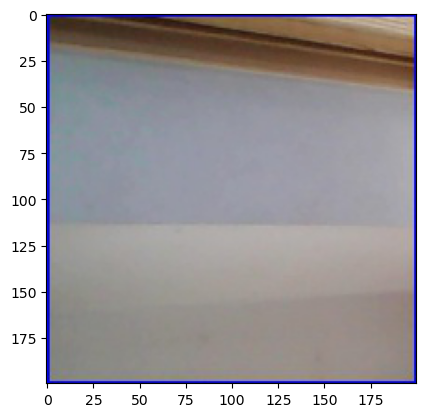

In [34]:
image = Image.open("D:/main_data/asl_alphabet_test/nothing_test.jpg")
plt.imshow(image)

In [35]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax
import os
import h5py

#### Predicting the sign of the image put into the model 

In [39]:
shape = ((50,50,3))
model = loaded_model
test_image = image.resize((80,80))
test_image = preprocessing.image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis =0)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
predictions = model.predict(test_image)
scores = tf.nn.softmax(predictions[0])
scores = scores.numpy()
image_class = class_names[np.argmax(scores)]
print(image_class)

1/1 [==============================] - 0s 105ms/step
nothing
